# Analysis

In [1]:
from aaai20.mercs_vs_weka import plot

import matplotlib.style as style
style.use('fivethirtyeight')


/cw/dtaijupiter/NoCsBack/dtai/elia/aaai20/out/manual/mercs-vs-weka/results/J48.csv
/cw/dtaijupiter/NoCsBack/dtai/elia/aaai20/out/manual/mercs-vs-weka/results/it.csv
/cw/dtaijupiter/NoCsBack/dtai/elia/aaai20/out/manual/mercs-vs-weka/results/rw.csv
/cw/dtaijupiter/NoCsBack/dtai/elia/aaai20/out/manual/mercs-vs-weka/results/mrai.csv
/cw/dtaijupiter/NoCsBack/dtai/elia/aaai20/out/manual/mercs-vs-weka/results/mi.csv
/cw/dtaijupiter/NoCsBack/dtai/elia/aaai20/out/manual/mercs-vs-weka/results/RF.csv


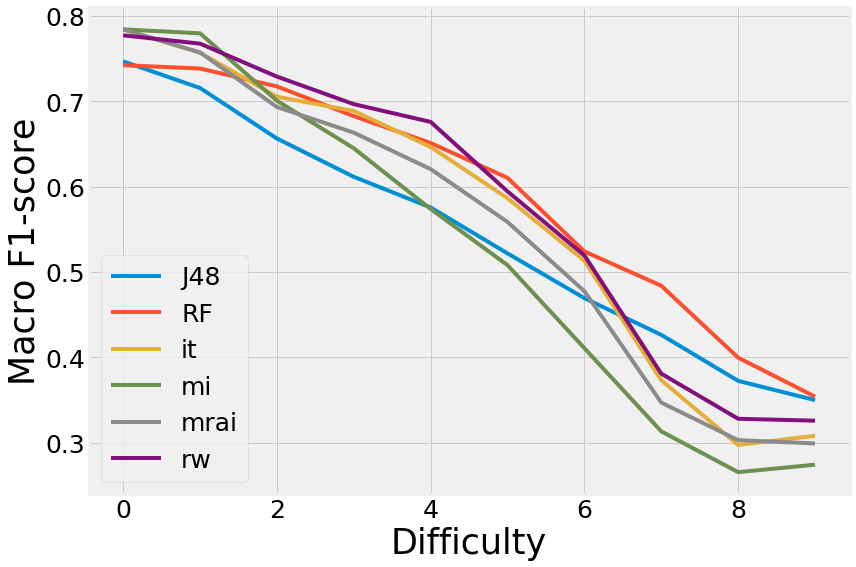

In [24]:
"""
SELECTION_ALGORITHM = "random"
FRACTION_MISSING = [0.4]
MAX_DEPTH = 8
ITERATIONS = 10
NB_TARGETS = 1
RANDOM_STATE = 98
"""

_, _ = plot(y_axis_quantity = 'f1_macro', axis=False)

/cw/dtaijupiter/NoCsBack/dtai/elia/aaai20/out/manual/mercs-vs-weka/results/J48.csv
/cw/dtaijupiter/NoCsBack/dtai/elia/aaai20/out/manual/mercs-vs-weka/results/it.csv
/cw/dtaijupiter/NoCsBack/dtai/elia/aaai20/out/manual/mercs-vs-weka/results/rw.csv
/cw/dtaijupiter/NoCsBack/dtai/elia/aaai20/out/manual/mercs-vs-weka/results/mrai.csv
/cw/dtaijupiter/NoCsBack/dtai/elia/aaai20/out/manual/mercs-vs-weka/results/mi.csv
/cw/dtaijupiter/NoCsBack/dtai/elia/aaai20/out/manual/mercs-vs-weka/results/RF.csv


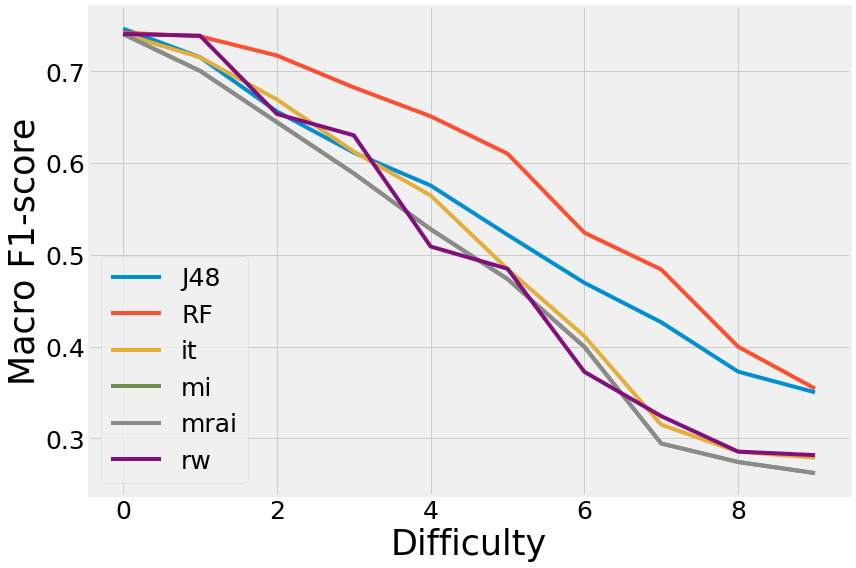

In [3]:
"""
SELECTION_ALGORITHM = "random"
FRACTION_MISSING = [0.4]
MAX_DEPTH = 8
ITERATIONS = 10
NB_TARGETS = 2
RANDOM_STATE = 98
"""

_, _ = plot(y_axis_quantity = 'f1_macro', axis=False)

/cw/dtaijupiter/NoCsBack/dtai/elia/aaai20/out/manual/mercs-vs-weka/results/J48.csv
/cw/dtaijupiter/NoCsBack/dtai/elia/aaai20/out/manual/mercs-vs-weka/results/it.csv
/cw/dtaijupiter/NoCsBack/dtai/elia/aaai20/out/manual/mercs-vs-weka/results/rw.csv
/cw/dtaijupiter/NoCsBack/dtai/elia/aaai20/out/manual/mercs-vs-weka/results/mrai.csv
/cw/dtaijupiter/NoCsBack/dtai/elia/aaai20/out/manual/mercs-vs-weka/results/mi.csv
/cw/dtaijupiter/NoCsBack/dtai/elia/aaai20/out/manual/mercs-vs-weka/results/RF.csv


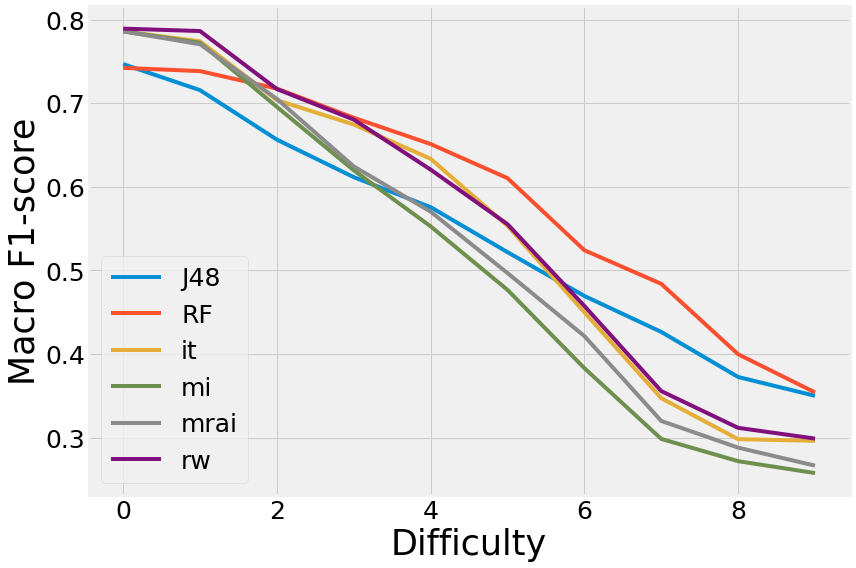

In [30]:
"""
SELECTION_ALGORITHM = "base"
FRACTION_MISSING = [0.4]
MAX_DEPTH = 8
ITERATIONS = 4
NB_TARGETS = 2
RANDOM_STATE = 98
"""

_, _ = plot(y_axis_quantity = 'f1_macro', axis=False)

/cw/dtaijupiter/NoCsBack/dtai/elia/aaai20/out/manual/mercs-vs-weka/results/J48.csv
/cw/dtaijupiter/NoCsBack/dtai/elia/aaai20/out/manual/mercs-vs-weka/results/it.csv
/cw/dtaijupiter/NoCsBack/dtai/elia/aaai20/out/manual/mercs-vs-weka/results/rw.csv
/cw/dtaijupiter/NoCsBack/dtai/elia/aaai20/out/manual/mercs-vs-weka/results/mrai.csv
/cw/dtaijupiter/NoCsBack/dtai/elia/aaai20/out/manual/mercs-vs-weka/results/mi.csv
/cw/dtaijupiter/NoCsBack/dtai/elia/aaai20/out/manual/mercs-vs-weka/results/RF.csv


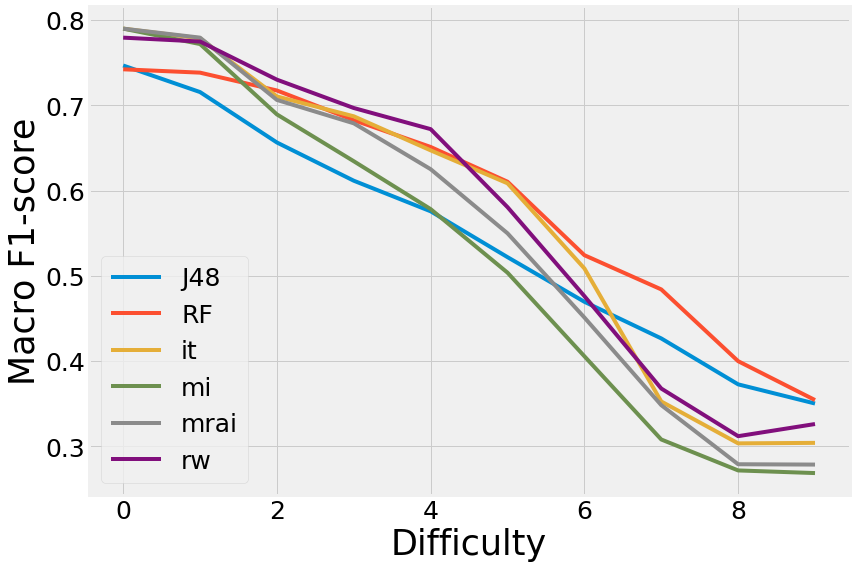

In [33]:
"""
SELECTION_ALGORITHM = "base"
FRACTION_MISSING = [0.4]
MAX_DEPTH = 8
ITERATIONS = 4
NB_TARGETS = 2
RANDOM_STATE = 98
"""

_, _ = plot(y_axis_quantity = 'f1_macro', axis=False)

/cw/dtaijupiter/NoCsBack/dtai/elia/aaai20/out/manual/mercs-vs-weka/results/J48.csv
/cw/dtaijupiter/NoCsBack/dtai/elia/aaai20/out/manual/mercs-vs-weka/results/it.csv
/cw/dtaijupiter/NoCsBack/dtai/elia/aaai20/out/manual/mercs-vs-weka/results/rw.csv
/cw/dtaijupiter/NoCsBack/dtai/elia/aaai20/out/manual/mercs-vs-weka/results/mrai.csv
/cw/dtaijupiter/NoCsBack/dtai/elia/aaai20/out/manual/mercs-vs-weka/results/mi.csv
/cw/dtaijupiter/NoCsBack/dtai/elia/aaai20/out/manual/mercs-vs-weka/results/RF.csv


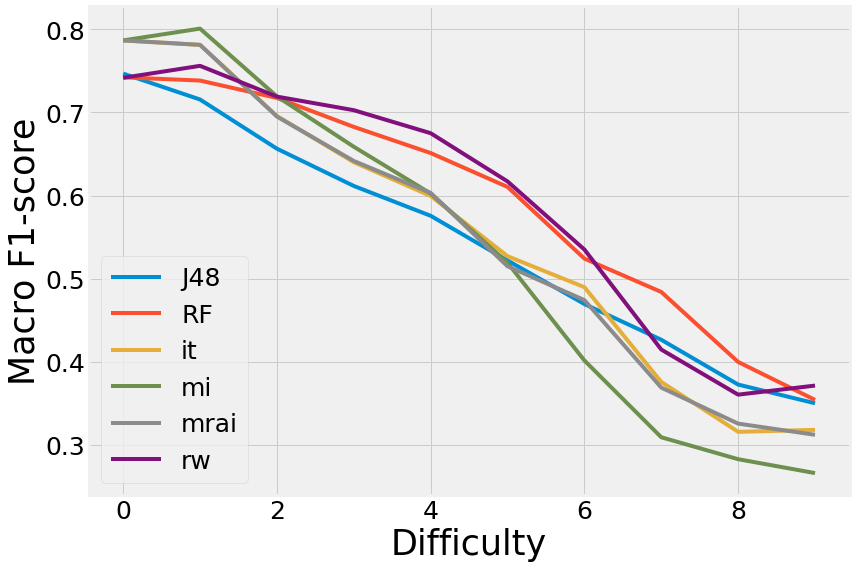

In [41]:
"""
SELECTION_ALGORITHM = "random"
FRACTION_MISSING = [0.3, 0.6, 0.8]
MAX_DEPTH = 8
ITERATIONS = 10
NB_TARGETS = 1
RANDOM_STATE = 98
"""

_, _ = plot(y_axis_quantity = 'f1_macro', axis=False)

/cw/dtaijupiter/NoCsBack/dtai/elia/aaai20/out/manual/mercs-vs-weka/results/J48.csv
/cw/dtaijupiter/NoCsBack/dtai/elia/aaai20/out/manual/mercs-vs-weka/results/it.csv
/cw/dtaijupiter/NoCsBack/dtai/elia/aaai20/out/manual/mercs-vs-weka/results/rw.csv
/cw/dtaijupiter/NoCsBack/dtai/elia/aaai20/out/manual/mercs-vs-weka/results/mrai.csv
/cw/dtaijupiter/NoCsBack/dtai/elia/aaai20/out/manual/mercs-vs-weka/results/mi.csv
/cw/dtaijupiter/NoCsBack/dtai/elia/aaai20/out/manual/mercs-vs-weka/results/RF.csv


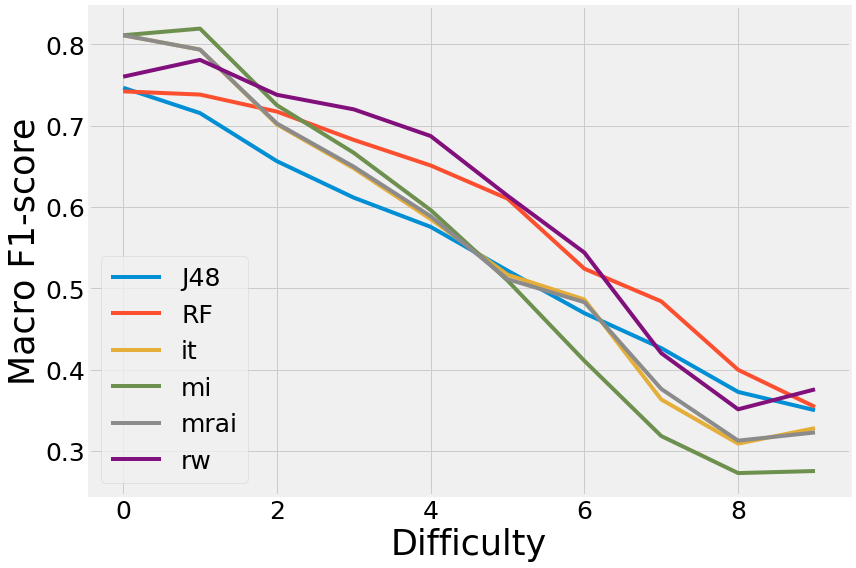

In [43]:
"""
SELECTION_ALGORITHM = "random"
FRACTION_MISSING = [0.3, 0.6, 0.7]
MAX_DEPTH = 6
ITERATIONS = 20
NB_TARGETS = 2
RANDOM_STATE = 98
"""

_, _ = plot(y_axis_quantity = 'f1_macro', axis=False)

/cw/dtaijupiter/NoCsBack/dtai/elia/aaai20/out/manual/mercs-vs-weka/results/J48.csv
/cw/dtaijupiter/NoCsBack/dtai/elia/aaai20/out/manual/mercs-vs-weka/results/it.csv
/cw/dtaijupiter/NoCsBack/dtai/elia/aaai20/out/manual/mercs-vs-weka/results/rw.csv
/cw/dtaijupiter/NoCsBack/dtai/elia/aaai20/out/manual/mercs-vs-weka/results/mrai.csv
/cw/dtaijupiter/NoCsBack/dtai/elia/aaai20/out/manual/mercs-vs-weka/results/mi.csv
/cw/dtaijupiter/NoCsBack/dtai/elia/aaai20/out/manual/mercs-vs-weka/results/RF.csv


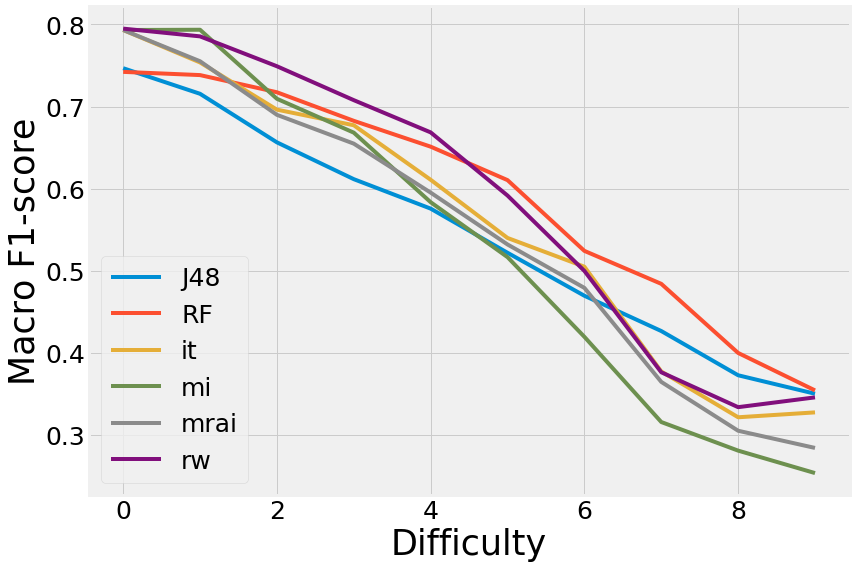

In [22]:
# 3 target
_, _ = plot(y_axis_quantity = 'f1_macro', axis=False)